# **conformalMaps**
### An interactive package for intercative use of conformal mappings

* Function **w = f(z) should be entered in standard Pythonic form**, (ex:z**2 for $z^2$)

* Functions entered should be availabe in SymPy lib and must be entered in same form because internally it uses sympy for symbolic conversion.

* The entered function w can be a function of z or of the form x + i y
'x' and 'y' are real and imaginary variables respectively.

* Typical usage
```
     z**2
     x**2 + I*y**2
     tan(z)
```
* **Note use 'I' for imaginary number $\rm{i}$ iota**

* Use transformation slider to see the transformation
* Limit range limits the grid to $\pm$ slider value
* Ticks increases number of gridlines

# Supported Grids to transform

* **Rectangle**

* **Square**

* **Donut**

* **Circle**

* **Single circle**

# Advanced builtin functions for w

* **Rectangle to Eccentric Annulus**

* **Rectangle to Elliptic Annulus**

* **Concentric Annulus To Eccentric Annulus**

# **Run the below Cells First**

**If you have installed all the dependences, or opening this repo with binder, Skip the next cell**

In [1]:
!pip install -r requirements.txt
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter nbextension enable --py widgetsnbextension

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
C:\Users\caris\miniconda3\envs\roar_py\lib\site-packages\jupyterlab\debuglog.py:54: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
C:\Users\caris\miniconda3\envs\roar_py\lib\site-packages\jupyterlab\debuglog.py:55: UserWarning: ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
  warnings.warn(msg[-1].strip())
C:\Users\caris\miniconda3\envs\roar_py\lib\site-packages\jupyterlab\debuglog.py:56: UserWarning: See the log file for details: C:\Users\caris\AppData\Local\Temp\jupyterlab-deb

In [2]:
from conformalMaps.grids import *
from conformalMaps.mappings import RectangleToEccentricAnnulus, RectangleToEllipticAnnulus, ConcentricAnnulusToEccentricAnnulus
from ipywidgets import widgets
from ipywidgets import HBox,VBox

# Using Rectangle grid

In [3]:
rect = Rectangle()

left = widgets.FloatSlider(min=-10, max=10, value=-1, description='left')
bottom = widgets.FloatSlider(min=-10, max=10, value=-1, description='bottom')

top = widgets.FloatSlider(min=-10, max=10, value=1, description='top')
right = widgets.FloatSlider(min=-10, max=10, value=1, description='right')

fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

Hticks = widgets.IntSlider(min = 2, max = 50, value=10, description='Hticks')
Vticks = widgets.IntSlider(min = 2, max = 50, value=10, description='Vticks')


function = widgets.Text( value = 'z**2' , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 5, description='anim')

play = widgets.Play(min= 0, max = 100, step = 5)
widgets.jslink((play, 'value'), (frame, 'value'))

interactive_plot = widgets.interactive(rect.updateFunc,
                                       w = function,
                                       left = left,
                                       right = right,
                                       top= top,
                                       bottom = bottom,
                                       fine = fine,
                                      Hticks = Hticks,
                                      Vticks = Vticks,
                                      frame = frame
                                      )


w1 = VBox([ left, right])
w2 = VBox([top,bottom])
w3 = VBox([Hticks,Vticks])
w4 = HBox([w1,w2,w3])

w5 = HBox([function, fine])

anim_slider = HBox([play, frame])

w = VBox([w4, w5, anim_slider, rect.show()])

w

In [4]:
rect.check_analytic()

The function is conformal, angles are preserved :)


True

# Using Square Grid

In [5]:
sq = Square()

side = widgets.FloatSlider(min=0.01, max=10, value=1, description='side')

fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

Hticks = widgets.IntSlider(min = 2, max = 50, value=10, description='Hticks')
Vticks = widgets.IntSlider(min = 2, max = 50, value=10, description='Vticks')


function = widgets.Text( value = 'z**2' , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 5, description='anim')

play = widgets.Play(min= 0, max = 100, step = 5)
widgets.jslink((play, 'value'), (frame, 'value'))


interactive_plot = widgets.interactive(sq.updateFunc,
                                       w = function,
                                       side = side,
                                       fine = fine,
                                      Hticks = Hticks,
                                      Vticks = Vticks,
                                      frame = frame
                                      )

# w1 = VBox([ left, right])
# w2 = VBox([top,bottom])
box1 = HBox([side, Hticks,Vticks])

box2 = HBox([function, fine])

anim_slider = HBox([play, frame])

w = VBox([box1, box2, anim_slider, sq.show()])

w

In [6]:
sq.check_analytic()

The function is conformal, angles are preserved :)


True

In [7]:
r = sym.sqrt(x**2+y**2)

f = x*(sym.sqrt(x**2+y**2-x**2*y**2))/r + sym.I*y*(sym.sqrt(x**2+y**2-x**2*y**2))/r # transforms unit square

sq2 = Square()

side = widgets.FloatSlider(min=0.01, max=10, value=1, description='side')

fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

Hticks = widgets.IntSlider(min = 2, max = 50, value=10, description='Hticks')
Vticks = widgets.IntSlider(min = 2, max = 50, value=10, description='Vticks')


function = widgets.Text(  value = '%s' %(f) , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 5, description='anim')

play = widgets.Play(min= 0, max = 100, step = 5)
widgets.jslink((play, 'value'), (frame, 'value'))


interactive_plot = widgets.interactive(sq2.updateFunc,
                                       w = function,
                                       side = side,
                                       fine = fine,
                                      Hticks = Hticks,
                                      Vticks = Vticks,
                                      frame = frame
                                      )

# w1 = VBox([ left, right])
# w2 = VBox([top,bottom])
box1 = HBox([side, Hticks,Vticks])

box2 = HBox([function, fine])

anim_slider = HBox([play, frame])

w = VBox([box1, box2, anim_slider, sq2.show()])

w


In [9]:
sq2.check_analytic()

The function is not conformal, angles are not preserved ...


False

# Using Donut Grid

In [10]:
donut = Donut()

rin = widgets.FloatSlider(min=0, max=10, value=1, description='Rin')
rout = widgets.FloatSlider(min=1, max=20, value=3, description='Rout')

x0 = widgets.FloatSlider(min=-10, max=10, value=0, description='x0')
y0 = widgets.FloatSlider(min=-10, max=10, value=0, description='y0')

cticks = widgets.IntSlider(min = 2, max = 50, value=4, description='cticks')
rticks = widgets.IntSlider(min = 2, max = 50, value=4, description='rticks')

fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

function = widgets.Text( value = 'z**2' , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 2, description='anim')

play = widgets.Play(min= 0, max = 100, step = 5)
widgets.jslink((play, 'value'), (frame, 'value'))

interactive_plot = widgets.interactive(donut.updateFunc,
                                       rin = rin,
                                       rout = rout,
                                       x0 = x0,
                                       y0 = y0,
                                       fine = fine,
                                       cticks = cticks,
                                       rticks = rticks,
                                       w = function,
                                       frame = frame)

radius = VBox([rin, rout])
offset = VBox([x0, y0])
ticks = VBox([cticks, rticks])
group = HBox([radius, offset,ticks])
animation = HBox([play, frame])

w1 = VBox([group, HBox([fine, function]), animation, donut.show()])

w1

In [11]:
donut.check_analytic()

The function is conformal, angles are preserved :)


True

# Using Circle Grid

In [12]:
circle = Circle()

r = widgets.FloatSlider(min=0.1, max=10, value=1, description='R')


x0 = widgets.FloatSlider(min=-10, max=10, value=0, description='x0')
y0 = widgets.FloatSlider(min=-10, max=10, value=0, description='y0')

cticks = widgets.IntSlider(min = 2, max = 50, value=4, description='cticks')
rticks = widgets.IntSlider(min = 0, max = 50, value=4, description='rticks')

fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

function = widgets.Text( value = 'z**2' , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 2, description='anim')

play = widgets.Play(min= 0, max = 100, step = 2)
widgets.jslink((play, 'value'), (frame, 'value'))

interactive_plot = widgets.interactive(circle.updateFunc,
                                       r = r,
                                       x0 = x0,
                                       y0 = y0,
                                       fine = fine,
                                       cticks = cticks,
                                       rticks = rticks,
                                       w = function,
                                       frame = frame)

radius = VBox([r, fine])
offset = VBox([x0, y0])
ticks = VBox([cticks, rticks])
group = HBox([radius, offset,ticks])
animation = HBox([play, frame])

w1 = VBox([group, function, animation, circle.show()])

w1
# display(interactive_plot,circle.show())

In [13]:
circle.check_analytic()

The function is conformal, angles are preserved :)


True

# Using Single_circle

In [14]:
single = Single_circle(rticks=0)

r = widgets.FloatSlider(min=0.1, max=10, value=1.08, description='R')


x0 = widgets.FloatSlider(min=-10, max=10, value=-0.08, description='x0')
y0 = widgets.FloatSlider(min=-10, max=10, value=0.08, description='y0')

rticks = widgets.IntSlider(min = 0, max = 50, value=0, description='rticks')

fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

function = widgets.Text( value = 'z+1/z' , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 2, description='anim')

play = widgets.Play(min= 0, max = 100, step = 2)
widgets.jslink((play, 'value'), (frame, 'value'))

interactive_plot = widgets.interactive(single.updateFunc,
                                       r = r,
                                       x0 = x0,
                                       y0 = y0,
                                       fine = fine,
                                       rticks = rticks,
                                       w = function,
                                       frame = frame)

radius = VBox([r, fine])
offset = VBox([x0, y0])
# ticks = VBox([cticks, rticks])
group = HBox([radius, offset,rticks])
animation = HBox([play, frame])

w1 = VBox([group, function, animation, single.show()])

w1

In [15]:
single.check_analytic()

The function is conformal, angles are preserved :)


True

# Using Builtin complicated functions for w

In engineering one may be interested in soling the Laplace in Poisson equation in "complicated" domains as eccentric annuli or elliptic annuli. With the help of builtin functions from ```conformalMaps``` one can see how those domains are conformally related to simple domains as eccentric annuli or rectangles.

### using EccentricAnnulus as w
Mapping a cetrain rectangle to a specific eccentric annulus (donuts)

In [16]:
R1 = 4 # inner radius of target eccentric annulus
R2 = 7.6 # outer radius of target eccentric annulus
ep = 0.7 # relative eccentricity of target eccentric annulus

trans = RectangleToEccentricAnnulus(R1, R2, ep)


rect = Rectangle()

left = widgets.FloatSlider(min=-10, max=10, value=-pi, description='left')
right = widgets.FloatSlider(min=-10, max=10, value=pi, description='right')

top = widgets.FloatSlider(min=-10, max=10, value=1.5, description='top')
bottom = widgets.FloatSlider(min=-10, max=10, value=0.8, description='bottom')


fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

Hticks = widgets.IntSlider(min = 2, max = 50, value=10, description='Hticks')
Vticks = widgets.IntSlider(min = 2, max = 50, value=20, description='Vticks')


function = widgets.Text( value = '{0}'.format(trans.mapping(z)) , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 5, description='anim')

play = widgets.Play(min= 0, max = 100, step = 5)
# widgets.jslink((frame, 'value'), (play, 'value'))
widgets.jslink((play, 'value'), (frame, 'value'))

interactive_plot = widgets.interactive(rect.updateFunc,
                                       w = function,
                                       left = left,
                                       right = right,
                                       top= top,
                                       bottom = bottom,
                                       fine = fine,
                                      Hticks = Hticks,
                                      Vticks = Vticks,
                                      frame = frame
                                      )


w1 = VBox([ left, right])
w2 = VBox([top,bottom])
w3 = VBox([Hticks,Vticks])
w4 = HBox([w1,w2,w3])

w5 = HBox([function, fine])

anim_slider = HBox([play, frame])

w = VBox([w4, w5, anim_slider, rect.show()])

w



### using EccentricAnnulus as w
Mapping a cetrain donur or concentric annulus to a specific eccentric annulus (donuts)

In [17]:
R1 = 4 # inner radius of target eccentric annulus
R2 = 7.6 # outer radius of target eccentric annulus
ep = 0.7 # relative eccentricity of target eccentric annulus

trans = ConcentricAnnulusToEccentricAnnulus(R1, R2, ep)


donut = Donut()




rin = widgets.FloatSlider(min=0, max=10, value=trans.rin, description='Rin')
rout = widgets.FloatSlider(min=1, max=20, value=trans.rout, description='Rout')

x0 = widgets.FloatSlider(min=-10, max=10, value=0, description='x0')
y0 = widgets.FloatSlider(min=-10, max=10, value=0, description='y0')

cticks = widgets.IntSlider(min = 2, max = 50, value=20, description='cticks')
rticks = widgets.IntSlider(min = 2, max = 50, value=20, description='rticks')

fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

function = widgets.Text( value = '%s' % (trans.mapping(z)) , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 2, description='anim')

play = widgets.Play(min= 0, max = 100, step = 5)
widgets.jslink((play, 'value'), (frame, 'value'))

interactive_plot = widgets.interactive(donut.updateFunc,
                                       rin = rin,
                                       rout = rout,
                                       x0 = x0,
                                       y0 = y0,
                                       fine = fine,
                                       cticks = cticks,
                                       rticks = rticks,
                                       w = function,
                                       frame = frame)

radius = VBox([rin, rout])
offset = VBox([x0, y0])
ticks = VBox([cticks, rticks])
group = HBox([radius, offset,ticks])
animation = HBox([play, frame])

w1 = VBox([group, HBox([fine, function]), animation, donut.show()])

w1


### Using EllipticAnnulus as w
Mapping a cetrain rectangle to a specific elliptic annulus (donut)

In [18]:
a = 5 # half axis of outer ellipse

b = 3.6 # half axis of inner ellipse

trans = RectangleToEllipticAnnulus(b, a)


rect = Rectangle()

left = widgets.FloatSlider(min=-10, max=10, value=trans.left, description='left')
right = widgets.FloatSlider(min=-10, max=10, value=trans.right, description='right')

top = widgets.FloatSlider(min=-10, max=10, value=trans.top, description='top')
bottom = widgets.FloatSlider(min=-10, max=10, value=trans.bottom, description='bottom')


fine = widgets.IntSlider(min = 20, max = 100, value=50, description='Fine')

Hticks = widgets.IntSlider(min = 2, max = 50, value=10, description='Hticks')
Vticks = widgets.IntSlider(min = 2, max = 50, value=20, description='Vticks')


function = widgets.Text( value = '{0}'.format(trans.mapping(z)) , description='w : ')

frame = widgets.FloatSlider(min=0, max=100, value=100, step = 5, description='anim')

play = widgets.Play(min= 0, max = 100, step = 5)
# widgets.jslink((frame, 'value'), (play, 'value'))
widgets.jslink((play, 'value'), (frame, 'value'))

interactive_plot = widgets.interactive(rect.updateFunc,
                                       w = function,
                                       left = left,
                                       right = right,
                                       top= top,
                                       bottom = bottom,
                                       fine = fine,
                                      Hticks = Hticks,
                                      Vticks = Vticks,
                                      frame = frame
                                      )


w1 = VBox([ left, right])
w2 = VBox([top,bottom])
w3 = VBox([Hticks,Vticks])
w4 = HBox([w1,w2,w3])

w5 = HBox([function, fine])

anim_slider = HBox([play, frame])

w = VBox([w4, w5, anim_slider, rect.show()])

w



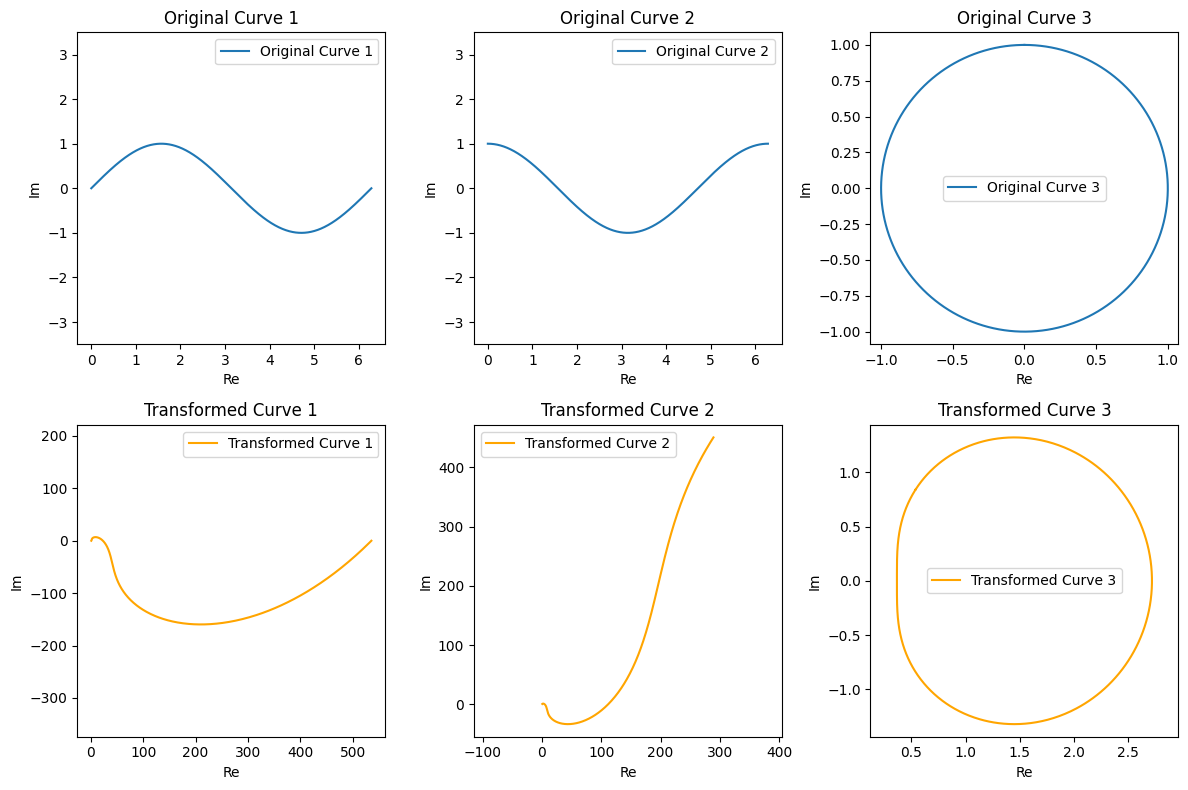

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define a set of curves
def gamma1(t):
    return t + 1j * np.sin(t)

def gamma2(t):
    return t + 1j * np.cos(t)

def gamma3(t):
    return np.sin(t) + 1j * np.cos(t)

# Define the conformal map (exponential function)
def conformal_map(z):
    return np.exp(z)

# Generate parameter values
t_values = np.linspace(0, 2 * np.pi, 1000)

# Compute the original curves
original_curve1 = gamma1(t_values)
original_curve2 = gamma2(t_values)
original_curve3 = gamma3(t_values)

# Apply the conformal map to the original curves
transformed_curve1 = conformal_map(original_curve1)
transformed_curve2 = conformal_map(original_curve2)
transformed_curve3 = conformal_map(original_curve3)

# Plot the original and transformed curves
plt.figure(figsize=(12, 8))

# Plot original curves
plt.subplot(2, 3, 1)
plt.plot(original_curve1.real, original_curve1.imag, label="Original Curve 1")
plt.title("Original Curve 1")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.axis('equal')

plt.subplot(2, 3, 2)
plt.plot(original_curve2.real, original_curve2.imag, label="Original Curve 2")
plt.title("Original Curve 2")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.axis('equal')

plt.subplot(2, 3, 3)
plt.plot(original_curve3.real, original_curve3.imag, label="Original Curve 3")
plt.title("Original Curve 3")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.axis('equal')

# Plot transformed curves
plt.subplot(2, 3, 4)
plt.plot(transformed_curve1.real, transformed_curve1.imag, label="Transformed Curve 1", color='orange')
plt.title("Transformed Curve 1")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.axis('equal')

plt.subplot(2, 3, 5)
plt.plot(transformed_curve2.real, transformed_curve2.imag, label="Transformed Curve 2", color='orange')
plt.title("Transformed Curve 2")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.axis('equal')

plt.subplot(2, 3, 6)
plt.plot(transformed_curve3.real, transformed_curve3.imag, label="Transformed Curve 3", color='orange')
plt.title("Transformed Curve 3")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()

In [46]:
f = open('section.txt')
points = []
for line in f.readlines():
    line = line.split('\n')[0]
    coords = line.split(",")
    points.append((float(coords[0][1:]), float(coords[1][1:(len(coords[1])-1)])))
print(points)

[(37.63455505, 160.16862421), (44.29532319, 149.98852606), (36.16375274, 158.81335382), (42.82451707, 148.63327094), (34.69294662, 157.45809869), (41.35371094, 147.27801581), (33.2221405, 156.10284357), (39.88290864, 145.92274542), (31.75133819, 154.74757318), (38.41210251, 144.5674903), (30.28053207, 153.39231805), (36.94130021, 143.21221991), (28.80972976, 152.03704767), (35.47049409, 141.85696478), (27.33892364, 150.68179254), (33.99968764, 140.50171001), (25.86811784, 149.32653706), (32.52888566, 139.14643927), (24.39731521, 147.97126703), (31.05807953, 137.79118414), (22.92650909, 146.6160119), (29.58727532, 136.43591376), (21.45570487, 145.26074152), (28.11647111, 135.08065863), (19.98490066, 143.90548639), (26.64566498, 133.7254035), (18.51409454, 142.55023126), (25.17486077, 132.37013312), (17.04329032, 141.19496088), (23.70405655, 131.01487799), (15.57248611, 139.83970575), (22.23325234, 129.65960761), (14.10168189, 138.48443536), (20.76244622, 128.30435248), (12.63087577, 137

In [32]:
def conformal_map(z):
    return np.exp(z)

In [47]:
transformed_curve = []
for point in points:
    transformed_point = (conformal_map(point[0]), conformal_map(point[1]))
    # transformed_point = conformal_map(point)
    transformed_curve.append(transformed_point)
print(transformed_curve)

[(2.2104443575767852e+16, 3.6337050163425855e+69), (1.7266902453413261e+19, 1.3778096325229062e+65), (5078298909052148.0, 9.370509743313214e+68), (3.966901836113518e+18, 3.553116083175033e+64), (1166689469695245.0, 2.4164810404616332e+68), (9.113568610499092e+17, 9.162828794536768e+63), (268035486503457.84, 6.231657441550818e+67), (2.093761185910152e+17, 2.362887909430201e+63), (61578764198794.74, 1.6070046002747737e+67), (4.810211346315268e+16, 6.093450673851853e+62), (14147118362709.717, 4.1441674517970936e+66), (1.1051031975923258e+16, 1.5713641765890215e+62), (3250174359798.8296, 1.0686877910745028e+66), (2538866432732603.5, 4.052257395172801e+61), (746695747564.5197, 2.755948028491409e+65), (583279520878416.4, 1.0450025622871812e+61), (171546094494.1203, 7.10707742789133e+64), (134003315753174.98, 2.6948261403682802e+60), (39411173720.05515, 1.8327564279411655e+64), (30785949907634.33, 6.9494578778783115e+59), (9054331419.042147, 4.726339634900107e+63), (7072784177895.288, 1.79210

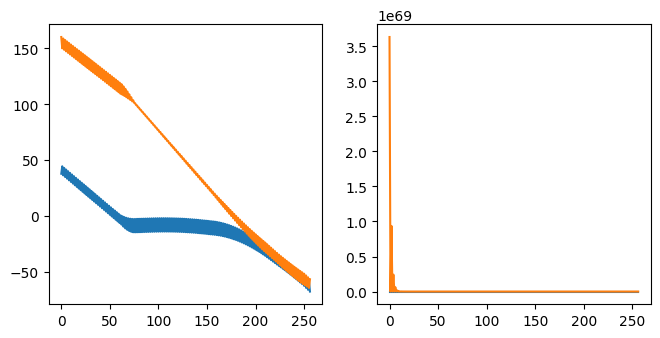

In [48]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.plot(points)
plt.subplot(2, 3, 2)
plt.plot(transformed_curve)